<a href="https://colab.research.google.com/github/ucfilho/vichebling2810/blob/main/volume_laranjas/ANN_laranjas_v1_nov_27_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import os 
import cv2
import re, random
from skimage import feature
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import random
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [ ]:

#link: https://drive.google.com/file/d/1tqFHN01uA3_MlLcmJvAC-2tnd8p8byDW/view?usp=sharing
!gdown --id 1tqFHN01uA3_MlLcmJvAC-2tnd8p8byDW


Downloading...
From: https://drive.google.com/uc?id=1tqFHN01uA3_MlLcmJvAC-2tnd8p8byDW
To: /content/laranjas2.zip
100% 1.10G/1.10G [00:05<00:00, 198MB/s]


In [ ]:
import zipfile
file_name = zipfile.ZipFile('laranjas2.zip', 'r')
file_name.extractall()

In [ ]:
FILE='laranjas2.zip'
img_name=[]
x_original = [] 

ref ='png'
data_file ='xlsx'

with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
      if(name[-3:]==ref):
        img_name.append(name)
        #x_original.append(cv2.resize(cv2.imread(name),(60,80)))
        x_original.append(cv2.resize(cv2.imread(name,0),(60,80)))
      else:
        if(name[-4:] == data_file):
          df =pd.read_excel(name)


In [ ]:
name_down=[]  # down representa as frutas deitadas
original_down = [] 
name_up=[] # down representa as frutas em pe
original_up= [] 

In [ ]:
k = 0
for name in img_name:
  if(name[-5]=='a'):
    name_up.append(name)
    original_up.append(x_original[k])
  else:
    name_down.append(name)
    original_down.append(x_original[k])
  k = k +1


In [ ]:
def get_dimension(img):
  im = img
  # Compute the Canny filter for two values of sigma
  edges1 = feature.canny(im)
  edges2 = feature.canny(im, sigma=3)
  nrows,ncols =edges2.shape
  Foto = np.ones((nrows,ncols))*255
  for i in range(nrows):
    for j in range(ncols):
      if edges2[i,j] == True:
        Foto[i,j]=0
  Foto = Foto.astype(int)
# calculo do raio horizontal
  Quadrado = []
  Raio = []
  for i in range(nrows):
    values = np.zeros(4)
    k = -1
    for j in range(1,ncols):
      if(Foto[i,j-1]==255 and Foto[i,j]==0):
        if(k<3):
          k = k+1
          values[k]=j
    L = values[3] - values[0]
    d = values[2] - values[1]
    Quadrado.append(L)
    Raio.append(d)
  L = np.array(Quadrado).max()
  Raio = np.array(Raio).max()
  medida = Raio/L*14.5
  return medida,Foto


In [ ]:
def area_fruta(img):
  (rows, cols) =img.shape

  img_fruit = np.zeros(img.shape,np.uint8) 

  for i in range(rows):
    for j in range(cols):
      if(img[i,j]>100):
        img[i,j]=0


  for i in range(rows):
    for j in range(cols):
      if(img[i,j]>0):
        img[i,j]=255
        img_fruit[i,j]=255

  xi=0;xf=0;yi=0;yf=0;
  jref=int(cols/2)
  iref=int(rows/2)

  for i in range(rows):
    j = jref
    if(img[i,j]>0):
      if(xi==0):
        xi = i
      else:
        xf = i
  for j in range(cols):
    i = iref
    if(img[i,j]>0):
      if(yi==0):
        yi = j
      else:
        yf = j

  for i in range(rows):
    for j in range(cols):
      if(i > xi and i < xf and j>yi and j < yf):
        img[i,j]=255

    area = 1-np.sum(img_fruit.ravel())/np.sum(img.ravel())

  return area

In [ ]:
np.array(original_down).shape

(100, 80, 60)

In [ ]:
(num,l,w)=np.array(original_down).shape

In [ ]:
dimensao =[]
for i in range(num):
  lista =[]
  Ind = i
  img= original_up[Ind]
  medida1,foto = get_dimension(img)
  lista.append(medida1)
  img = img.transpose()
  medida2,foto = get_dimension(img)
  lista.append(medida2)
  img2= original_down[Ind]
  medida3,foto = get_dimension(img2)
  lista.append(medida3)
  img2 = img2.transpose()
  medida4,foto = get_dimension(img2)
  lista.append(medida4)
  dimensao.append(lista)


In [ ]:
area_up =[]
area_down =[]
for i in range(num):
  lista =[]
  Ind = i
  img= original_up[Ind]
  area = area_fruta(img)
  area_up.append(area)
  img= original_down[Ind]
  area = area_fruta(img)
  area_down.append(area)

In [ ]:
print(area_up)

[0.18342749529190205, 0.18333333333333335, 0.1645427286356822, 0.19939462731744229, 0.14736042537030003, 0.1845979614949037, 0.16314996232102486, 0.18460955269143287, 0.18962906888720665, 0.18597560975609762, 0.18704484476811034, 0.17095310136157338, 0.1796610169491526, 0.15149166989538942, 0.17938066465256797, 0.17309896828429494, 0.20190839694656493, 0.16085489313835766, 0.1797795515013303, 0.19380430676237248, 0.19506726457399104, 0.21926536731634183, 0.19528875379939215, 0.19153758972421608, 0.21595184349134688, 0.17524602573807724, 0.18209067066316975, 0.2058047493403694, 0.1532288880397401, 0.17820658342792284, 0.1573506891271057, 0.17890772128060262, 0.21020793950850658, 0.18577374195989405, 0.17850432168357755, 0.16196918451709885, 0.16405082212257105, 0.1927574500188608, 0.15542857142857147, 0.15462373642830396, 0.19045771916214116, 0.18783679753656657, 0.1822306238185255, 0.1664787673806839, 0.1656580937972768, 0.14704747201852564, 0.1823015571591341, 0.18311981914091935, 0.1

In [ ]:
print(area_down)

[0.19419306184012064, 0.20463173880030372, 0.17516879219804948, 0.21928817451205507, 0.15305734903152302, 0.1969924812030075, 0.1879271070615034, 0.21044663133989405, 0.20204313280363229, 0.20839636913767023, 0.21054672353625437, 0.18367346938775508, 0.21030372933487118, 0.20847457627118648, 0.19871794871794868, 0.19358490566037734, 0.215228043724086, 0.17334331710969675, 0.1894054878048781, 0.20620506999621646, 0.2092675635276532, 0.23358490566037737, 0.218595825426945, 0.2108046845485455, 0.2269823374671176, 0.18631897203325776, 0.20090463626083677, 0.23024574669187148, 0.16488140780413163, 0.18205904617713853, 0.1732616212063004, 0.1902604756511891, 0.22332317073170727, 0.19885057471264367, 0.1840796019900498, 0.18707738542449281, 0.18164794007490637, 0.20581570996978849, 0.16660355925785686, 0.17199849454271732, 0.20219198790627357, 0.1973634651600753, 0.18583739228175344, 0.18071833648393199, 0.18216463414634143, 0.15674453654860587, 0.1923509561304837, 0.200376647834275, 0.171222

In [ ]:
def elipsoide(valores):
  dif = np.zeros(4)
  k = 0
  ref =1E99
  for i in range(2):
    for j in range(2):
      dif[k] = abs(valores[i]-valores[j+2])
      if(ref > dif[k]):
        ref = dif[k]
        ind1=i # 0,1
        ind2=j+2 # 2,3
      k = k+1
  b = (valores[ind1]+valores[ind2])/2
  if(ind1 ==0):
    a = valores[1]
  else:
    a = valores[0]
  if(ind2 ==2):
    c = valores[3]
  else:
    c = valores[2]
  Vol = 4/3*np.pi*a*b*c

  return Vol  
  

  

In [ ]:
Volume = []
X =[]
for i in range(num):
  valores = dimensao[i]
  X.append(valores)
  Vol = elipsoide(valores)
  Volume.append(Vol)

In [ ]:
#dimensao[0]

In [ ]:
df

,Volume
0,42.0
1,42.0
2,24.0
3,30.0
4,30.0
...,...
95,42.0
96,26.0
97,50.0
98,50.0


In [ ]:
y = df.iloc[0:,[0]].copy()

In [ ]:
#y = df['Volume'].values
#print(y)

In [ ]:
X = np.array(X)
#X =np.concatenate((X,np.array(Volume).reshape(num,1)),axis=1)
X =np.concatenate((X,np.array(area_up).reshape(num,1)),axis=1)
X =np.concatenate((X,np.array(area_down).reshape(num,1)),axis=1)
y = np.array(y)
y = y.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10, shuffle=True, random_state=3)# 1

In [ ]:
scaler_X = preprocessing.MinMaxScaler((-1,1)).fit(X)
scaler_Y = preprocessing.MinMaxScaler((-1,1)).fit(y)

In [ ]:
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_Y.transform(y_train)
y_test = scaler_Y.transform(y_test)

In [ ]:
y_test

array([[-0.65217391],
       [-0.82608696],
       [-0.2173913 ],
       [-0.39130435],
       [-0.65217391],
       [ 0.2173913 ],
       [ 0.39130435],
       [ 0.04347826],
       [-0.30434783],
       [-0.91304348]])

In [ ]:
# define a rede neural 
Neurons = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]
vetor_r2_treino =[]
vetor_r2_teste =[]
vetor_neuron =[]
for N_Hidden in Neurons:
  #model = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(N_Hidden), max_iter=1500,random_state=11 )
  model = MLPRegressor(solver='adam',activation='tanh',alpha=1e-5,
                       hidden_layer_sizes=(N_Hidden), max_iter=1500,random_state=11 )
  
  model.fit(X_train, y_train)
  y_calc_train=model.predict(X_train)
  y_calc_test=model.predict(X_test)
  mse_test=mean_squared_error(y_test,y_calc_test)
  R2_test=r2_score(y_test,y_calc_test)
  mse_train=mean_squared_error(y_train,y_calc_train)
  R2_train=r2_score(y_train,y_calc_train)
  vetor_r2_teste.append(R2_test)
  vetor_r2_treino.append(R2_train)
  vetor_neuron.append(N_Hidden)
  print("Neurons",N_Hidden,"MSE treino=",mse_train,"MSE teste=",mse_test)
  print("Neurons",N_Hidden,"R^2 treino=",R2_train,"R^2 teste=",R2_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neurons 2 MSE treino= 0.2114094745753566 MSE teste= 0.3906431586805545
Neurons 2 R^2 treino= -0.15228502503409636 R^2 teste= -1.2068585107006982
Neurons 4 MSE treino= 0.17863113491146057 MSE teste= 0.3220912929464859
Neurons 4 R^2 treino= 0.026372956194297026 R^2 teste= -0.8195887865088751


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neurons 6 MSE treino= 0.16662770688978312 MSE teste= 0.22554920236504983
Neurons 6 R^2 treino= 0.09179750912048767 R^2 teste= -0.27419402019555084
Neurons 8 MSE treino= 0.14394298518184057 MSE teste= 0.1990301811288679
Neurons 8 R^2 treino= 0.21544033626261183 R^2 teste= -0.12438024153322425
Neurons 10 MSE treino= 0.14460881996450722 MSE teste= 0.17398484731894212
Neurons 10 R^2 treino= 0.21181121107437362 R^2 teste= 0.0171082418654378


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neurons 12 MSE treino= 0.14451285716417617 MSE teste= 0.17731699081108276
Neurons 12 R^2 treino= 0.21233425526623828 R^2 teste= -0.00171602028046558
Neurons 14 MSE treino= 0.16298519969908618 MSE teste= 0.20769054416935728
Neurons 14 R^2 treino= 0.11165095465716346 R^2 teste= -0.17330518865431466
Neurons 16 MSE treino= 0.14389017614304794 MSE teste= 0.26886877904669804
Neurons 16 R^2 treino= 0.215728171349991 R^2 teste= -0.5189190956397192
Neurons 18 MSE treino= 0.14138632049816985 MSE teste= 0.23721778394701282
Neurons 18 R^2 treino= 0.22937540911090637 R^2 teste= -0.34011328180232603


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when 

Neurons 20 MSE treino= 0.14634926934623974 MSE teste= 0.16679238494905085
Neurons 20 R^2 treino= 0.2023249107870827 R^2 teste= 0.05774058481367017
Neurons 22 MSE treino= 0.14661286731914702 MSE teste= 0.16062150528039745
Neurons 22 R^2 treino= 0.2008881729236519 R^2 teste= 0.09260170553897629
Neurons 24 MSE treino= 0.14867085746704348 MSE teste= 0.19597437947897361
Neurons 24 R^2 treino= 0.1896711201692659 R^2 teste= -0.10711711602282215


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when 

Neurons 26 MSE treino= 0.14323903478346056 MSE teste= 0.1952077398358742
Neurons 26 R^2 treino= 0.2192772101967122 R^2 teste= -0.10278614238762773
Neurons 28 MSE treino= 0.14309192218436045 MSE teste= 0.16291850892163276
Neurons 28 R^2 treino= 0.2200790458063857 R^2 teste= 0.07962525395617537
Neurons 30 MSE treino= 0.14233507708245283 MSE teste= 0.1890239756898941
Neurons 30 R^2 treino= 0.22420422174256494 R^2 teste= -0.06785223344675351


Text(0, 0.5, 'coeficiente de correlacao')

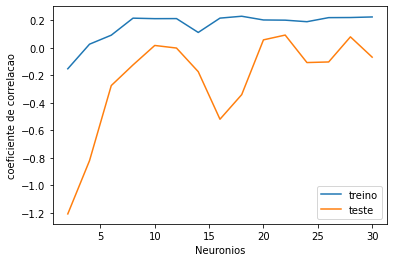

In [ ]:
plt.plot(vetor_neuron,vetor_r2_treino,vetor_neuron,vetor_r2_teste)
plt.legend(['treino','teste'])
plt.xlabel('Neuronios')
plt.ylabel('coeficiente de correlacao')

In [ ]:
vetor_r2_treino

[-0.15228502503409636,
 0.026372956194297026,
 0.09179750912048767,
 0.21544033626261183,
 0.21181121107437362,
 0.21233425526623828,
 0.11165095465716346,
 0.215728171349991,
 0.22937540911090637,
 0.2023249107870827,
 0.2008881729236519,
 0.1896711201692659,
 0.2192772101967122,
 0.2200790458063857,
 0.22420422174256494]